In [4]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [5]:
X , y = make_classification(n_samples=100 , n_classes=2 , n_features=2 , n_informative=1 ,hypercube=False,
                            n_clusters_per_class=1 , class_sep=40 , random_state=41 ,n_redundant=0)

In [6]:
X.shape , y.shape

((100, 2), (100,))

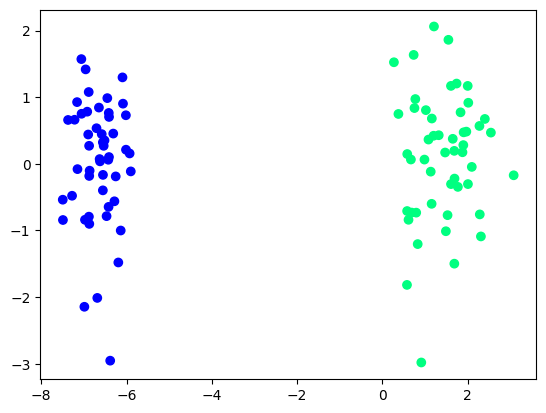

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1]  , c=y , cmap='winter')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=41 , test_size=0.1)
X_train.shape , X_test.shape


((90, 2), (10, 2))

In [9]:
y_train

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1])

In [10]:
# Perceptron Trick
# W = W - learning_rate*(y_true -y_hat)*X     X = [ 1 ,x1 , x2] , W = [w0 , w1 , w2]
# Actually the term (y_true-y_hat)*X is grad , we will get to know later
# y_hat = step(w0*1+w1*x1+w2*x2)  if (w0*1+w1*x1+w2*x2)<0 then y_hat =0 (class 0)
# if (w0*1+w1*x1+w2*x2)>0 then y_hat =1 (class 1)

In [11]:
def step(Z):
    return 1 if Z>0 else 0
    
def perceptron_trick(X_train , y_train):
    X_train = np.insert(X_train , 0 , 1 , axis=1)
    W = np.ones(X_train.shape[1])    # initializing weights
    epochs = 1000
    lr = 0.1
    for i in range(epochs):
        j = np.random.randint(0 , X_train.shape[0])
        y_hat = step(np.dot(W, X_train[j]))
        W = W+lr*(y[j]-y_hat)*X_train[j]
    return W[0] , W[1:]

In [12]:
intercept , coef = perceptron_trick(X , y)

In [13]:
intercept , coef

(np.float64(1.2000000000000002), array([1.14922552, 0.52024363]))

In [14]:
# wo+w1*x1+w2*x2  = 0 is decision boundary
m = -(coef[0]/coef[1])
c = -(intercept/coef[1])

In [15]:
x_t = np.linspace(-3 , 3 ,50)
y_t = m*x_t + c

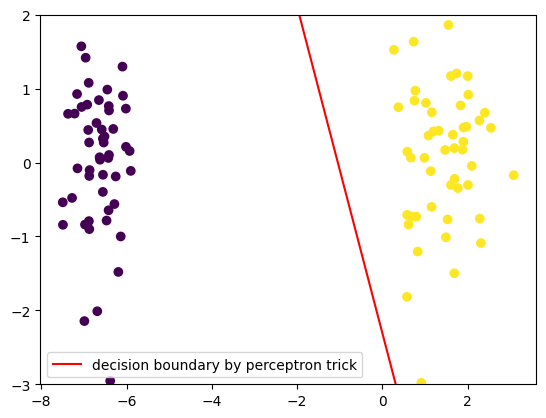

In [16]:
plt.scatter(X[:,0] , X[:,1] , c=y)
plt.plot(x_t , y_t , c='r' , label='decision boundary by perceptron trick')
plt.legend()
plt.ylim(-3,2)
plt.show()

In [17]:
LogR = LogisticRegression()
LogR.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
cof = LogR.coef_
interc = LogR.intercept_
cof , interc

(array([[1.43619066, 0.00802767]]), array([3.84812344]))

In [19]:
m2 = -cof[0][0]/cof[0][1]
c2 = -interc / cof[0][1]


In [20]:
y_t2 = m2*x_t + c2

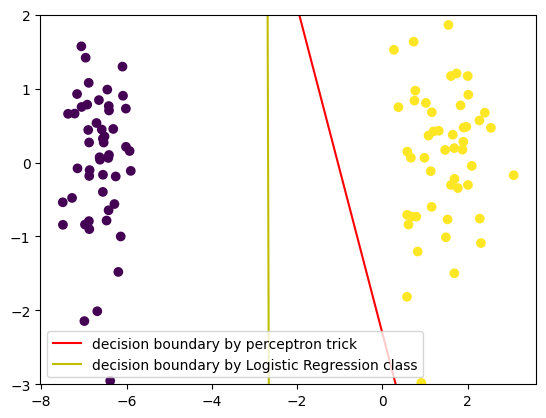

In [21]:
plt.scatter(X[:,0] , X[:,1] , c=y)
plt.plot(x_t , y_t , c='r' , label='decision boundary by perceptron trick')
plt.plot(x_t , y_t2 , c='y' , label='decision boundary by Logistic Regression class')
plt.legend()
plt.ylim(-3,2)
plt.show()

In [22]:
# Here once all the training points are correctly classified then decision boundary will stop
# moving that is no update in w because of y-y_hat =0
# so perceptron trick will work good on training data and will not perform good on text data
# because it will not be at equidistance from each class clsuter 
# on other hand you can see from logistic regression class the decision boundary is at
# equidistance from each cluster so if any test data will come then this discision boundary
# will classify better 


In [ ]:
# Instead of using step function use sigmoid sigma(z) = 1/(1+exp(-z)) , which will push
#The decision line for correctly classified point ( earlier no change for correctlly classifid)
# and for incorrectlly classified points it will pull towardes the point as usual 
# if sigma(z)>0.5 then class 1 and if sigma(z)<0.5 then class 0 sigma(z)=0.5--> w0+w1*x1+w2*x2=0
# z = w0+w1*x1+w2*x2 , z>0 --> sigma(z)>0.5 , z(0)<0 --> sigma(z)<0.5


In [33]:
import math
def sigmoid(Z):
    return 1/(1+math.exp(-Z))
    
def perceptron(X_train , y_train):
    X_train = np.insert(X_train , 0 , 1 , axis=1)
    W = np.ones(X_train.shape[1])    # initializing weights
    epochs = 1000
    lr = 0.1
    for i in range(epochs):
        j = np.random.randint(0 , X_train.shape[0])
        y_hat = sigmoid(np.dot(W, X_train[j]))
        W = W+lr*(y[j]-y_hat)*X_train[j]
    return W[0] , W[1:]

In [34]:
intercept2 , coef2 = perceptron(X , y)

In [35]:
# wo+w1*x1+w2*x2  = 0 is decision boundary
m3 = -(coef2[0]/coef2[1])
c3 = -(intercept2/coef2[1])

In [36]:
y_t3 = m3*x_t + c3

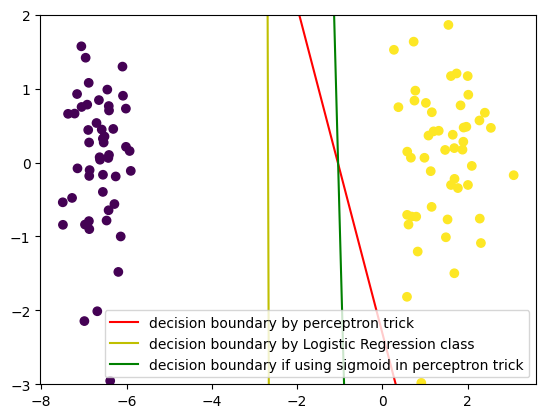

In [39]:
plt.scatter(X[:,0] , X[:,1] , c=y)
plt.plot(x_t , y_t , c='r' , label='decision boundary by perceptron trick')
plt.plot(x_t , y_t2 , c='y' , label='decision boundary by Logistic Regression class')
plt.plot(x_t , y_t3 , c='g' , label='decision boundary if using sigmoid in perceptron trick')
plt.legend()
plt.ylim(-3,2)
plt.show()

In [40]:
# Still it is not able to beat the LogisticRegression class
